In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('logitreg2.xlsx')

In [9]:
df

,Date,Econ Growth,yearly inflation rate
0,1960-12-01,1,1.5366
1,1961-12-01,1,2.2937
2,1962-12-01,0,2.8433
3,1963-12-01,1,2.9670
4,1964-12-01,1,2.3357
5,1965-12-01,1,3.2423
6,1966-12-01,0,3.5331
7,1967-12-01,1,1.7960
8,1968-12-01,1,1.4703
9,1969-12-01,1,1.9127


In [11]:
X = df[['yearly inflation rate']]

In [12]:
Y = df[['Econ Growth']]

In [13]:
X.head()

,yearly inflation rate
0,1.5366
1,2.2937
2,2.8433
3,2.9670
4,2.3357


In [14]:
Y.head()

,Econ Growth
0,1
1,1
2,0
3,1
4,1


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf_lrs = LogisticRegression()

In [17]:
clf_lrs.fit(X,Y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [18]:
clf_lrs.coef_

array([[-0.44333177]])

In [19]:
clf_lrs.intercept_

array([2.57502028])

In [20]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [20]:
import statsmodels.api as sn

In [21]:
X_cons = sn.add_constant(X)

In [22]:
X_cons.head()

,const,yearly inflation rate
0,1.0,1.5366
1,1.0,2.2937
2,1.0,2.8433
3,1.0,2.9670
4,1.0,2.3357


In [23]:
import statsmodels.discrete.discrete_model as sm

In [24]:
logit = sm.Logit(Y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.471661
         Iterations 6


In [25]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Econ Growth   No. Observations:                   59
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Apr 2021   Pseudo R-squ.:                  0.1056
Time:                        22:34:12   Log-Likelihood:                -27.828
converged:                       True   LL-Null:                       -31.113
Covariance Type:            nonrobust   LLR p-value:                   0.01037
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.6245      0.691      3.798      0.000       1.270       3.979
yearly inflation rate    -0.4586      0.186     -2.460      0.014      -0.824      -0.093
=========================================================================================
"""

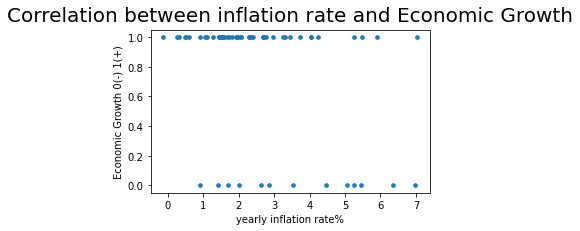

In [30]:
plt.figure(figsize=(5, 3))
plt.scatter(x = X, y = Y, s = 13)
plt.xlabel('yearly inflation rate%')
plt.ylabel('Economic Growth 0(-) 1(+)')
plt.title("Correlation between inflation rate and Economic Growth", y=1.015, fontsize=20)
plt.show()